# 1.5 Supervised Learning Algorithms: ANN

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
#Import the 'pleasant weather' answers dataset
df_answers = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [7]:
#Import the scaled dataset from last exercise
df_weather = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/weather_cleaned.csv')

In [9]:
#Create an 'X' and y df by dropping the unneeded columns
X = df_weather.drop(['DATE'], axis=1)
y = df_answers.drop(['DATE'],axis=1)

In [11]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
#View the shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 135)
(5738, 135)
(17212, 15)
(5738, 15)


In [15]:
#Scale the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scale the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749e+00 -6.16603154e-01 -7.46130745e-01 ...  1.45475014e+00
   1.57581674e+00  1.16512065e+00]
 [ 1.08186228e+00  5.57788069e-01 -2.14102475e-01 ... -1.39083977e-02
  -7.75529873e-03 -9.81650558e-03]
 [ 6.66372321e-01  7.38463642e-01 -1.26295821e+00 ... -2.92125284e+00
  -3.22950531e+00 -2.18774879e+00]
 ...
 [ 1.08186228e+00  1.64184151e+00 -1.29116784e-03 ... -7.38536440e-02
   4.83698093e-01 -6.11613584e-01]
 [ 6.66372321e-01  6.48125856e-01  1.50716909e-01 ...  5.55571442e-01
   4.29092160e-01  6.49294580e-01]
 [-1.41107749e+00 -1.33930544e+00 -9.24960140e-02 ... -1.39083977e-02
  -7.75529873e-03 -9.81650558e-03]]


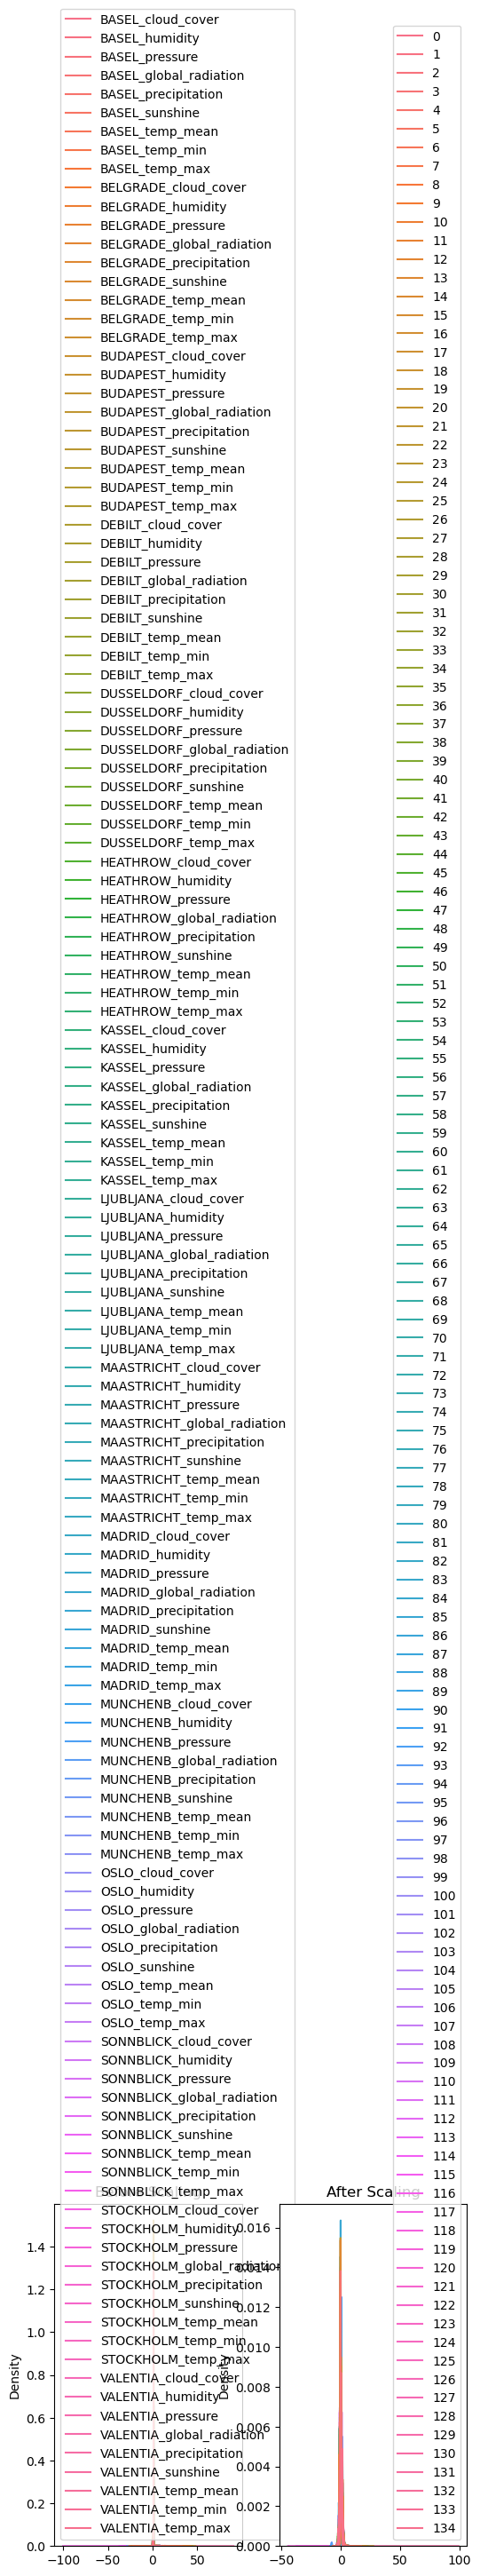

In [17]:
#Show scaling differences 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)

plt.show()

# Create the ANN

Scenario 1

In [19]:
#Hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [21]:
#Check accuracy of ANN
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.45212642342551707
0.4541652143604043


Scenario 2

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=1000, tol=0.000005)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=1000, tol=5e-06)

In [27]:
#Check accuracy of ANN
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5178944922147339
0.515336354130359


Scenario 3

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 24, 10), max_iter=3000, tol=0.0000001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(40, 24, 10), max_iter=3000, tol=1e-07)

In [36]:
#Check accuracy of ANN
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6215431094585173
0.5901010805158592


For scenario 3, the training data is 62% accurate, and the test data is 59% accurate.

In [42]:
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


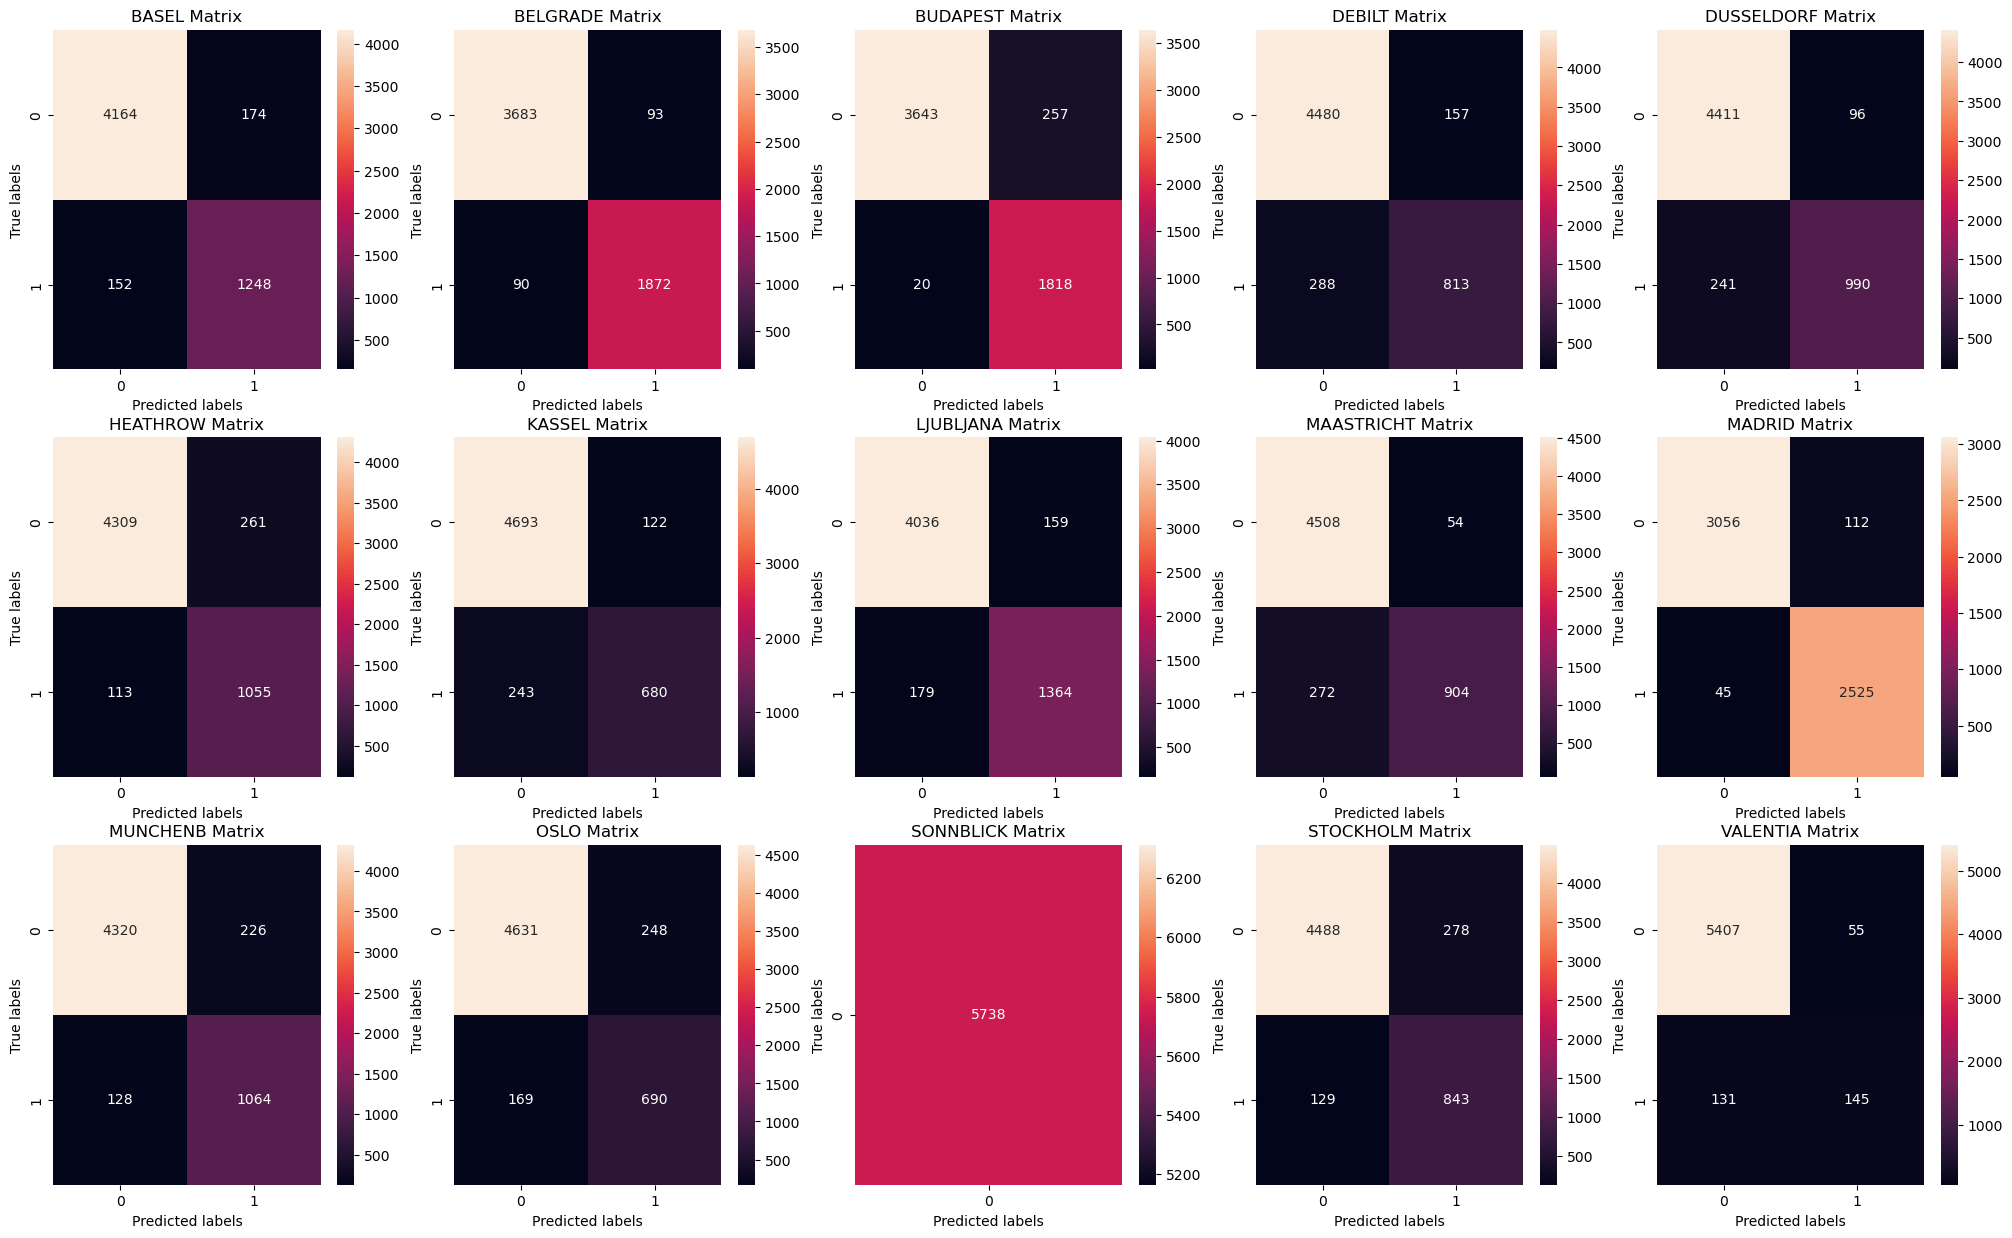

In [44]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1